In [383]:
import pandas as pd

df = pd.read_csv('./housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [385]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

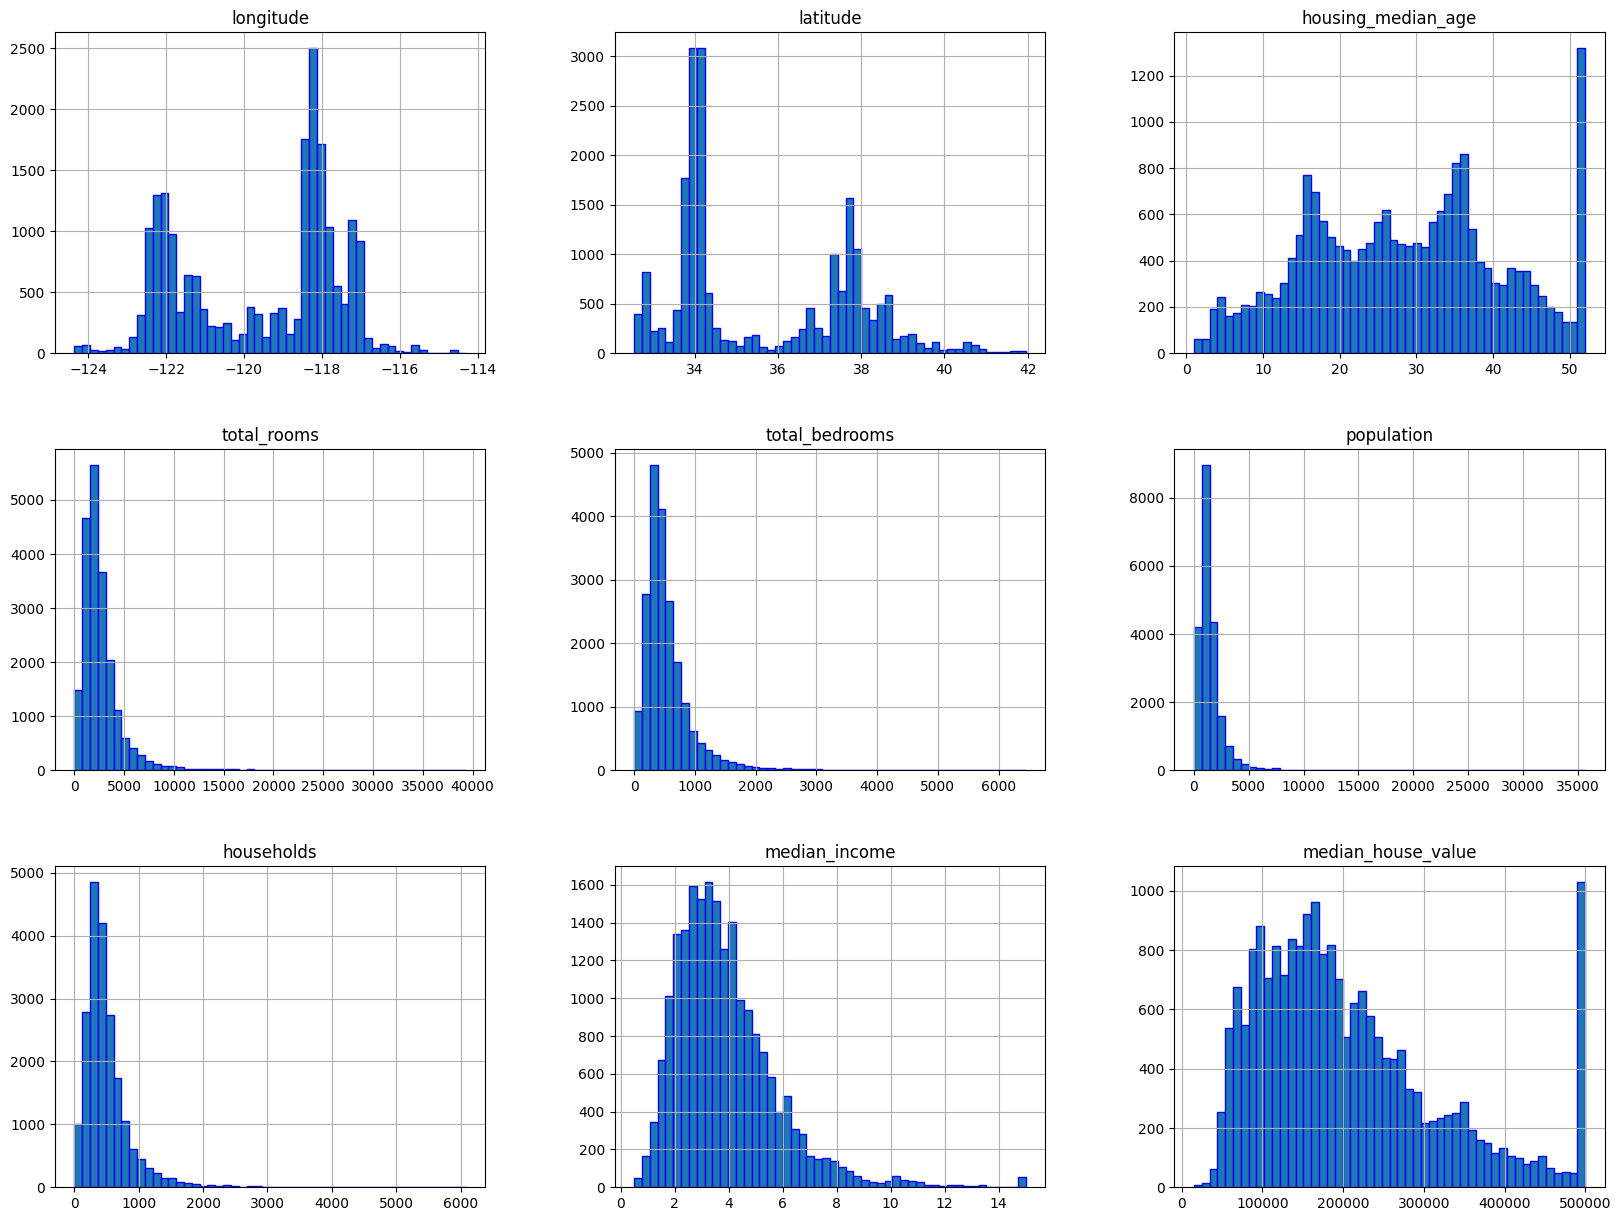

In [386]:
df.hist(bins=50, figsize=(20,15), edgecolor='blue')

In [387]:
datos = df.dropna()

<Axes: xlabel='latitude', ylabel='longitude'>

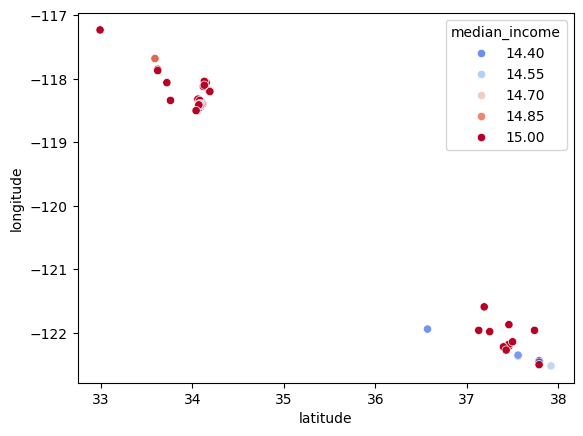

In [388]:
import seaborn as sb

sb.scatterplot(data=datos[datos['median_income'] > 14], x='latitude', y='longitude', hue='median_income', palette='coolwarm')

In [389]:
datos['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [390]:
datos = pd.concat([datos, pd.get_dummies(datos['ocean_proximity'], dtype=int)], axis=1)
datos.drop(['ocean_proximity'], axis=1, inplace=True)

In [391]:
datos = datos[(datos['housing_median_age'] < 50) &
              (datos['median_house_value'] < 500000) &
              (datos['median_income'] < 15)]

In [392]:
import numpy as np

datos['log_income'] = np.log1p(datos['median_income'])
datos['log_house_value'] = np.log1p(datos['median_house_value'])

In [393]:
datos['room_per_household'] = datos['total_rooms'] / datos['households']
datos['bedrooms_per_room'] = datos['total_bedrooms'] / datos['total_rooms']
datos['households_per_population'] = datos['households'] / datos['population']
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,log_income,log_house_value,room_per_household,bedrooms_per_room,households_per_population
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,2.232720,13.022766,6.984127,0.146591,0.391304
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,2.230165,12.789687,6.238137,0.155797,0.473969
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0,1.125059,12.331387,4.294118,0.260274,0.493367
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,0,0,0,1,0,0.857729,11.901590,4.524096,0.245007,0.405868
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,0,0,0,1,0,0.998239,11.981685,4.478142,0.223917,0.393972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,0.940124,11.265758,5.045455,0.224625,0.390533
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,1.268861,11.252872,6.114035,0.215208,0.320225
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,0.993252,11.432810,5.205543,0.215173,0.429990
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,1.053336,11.346883,5.329513,0.219892,0.470985


In [394]:
# Características de entrada
X = datos.drop(columns=['median_house_value', 'median_income'], axis=1) # 'axis=1' para eliminar la columna.

# Etiqueta de salida
y = datos['median_house_value']

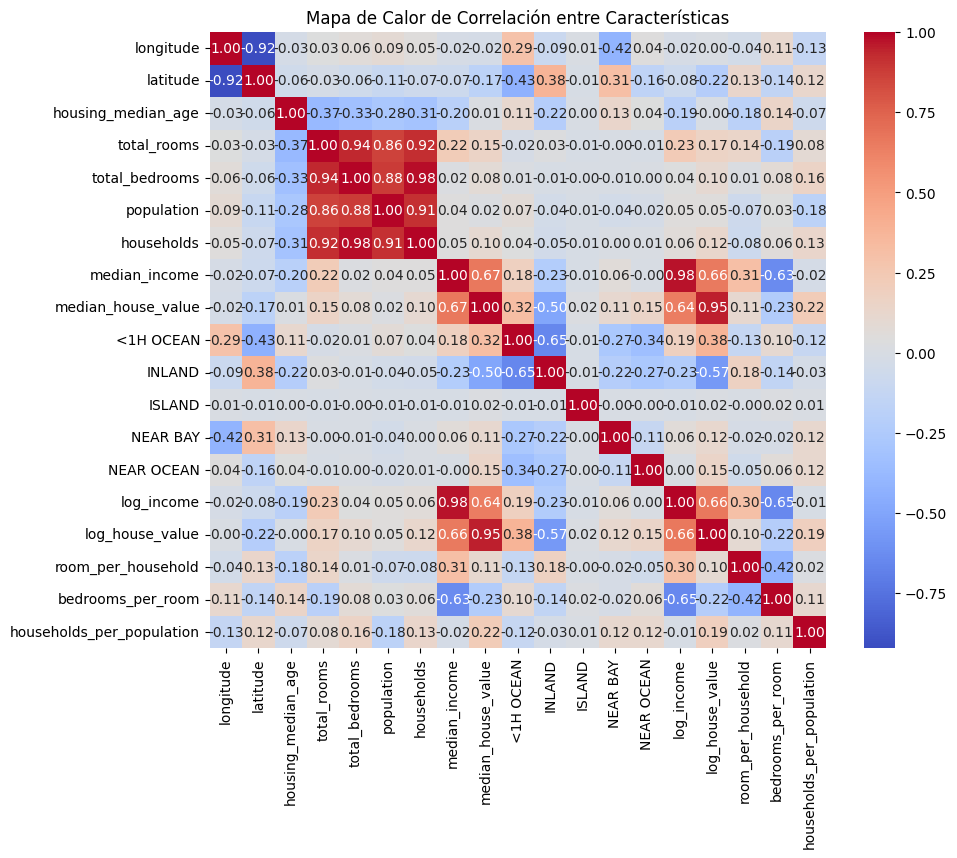

In [395]:
# Mapa de calor de correlación entre las características
plt.figure(figsize=(10, 8))
correlation_matrix = datos.corr()
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Mapa de Calor de Correlación entre Características")
plt.show()

In [396]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [397]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=20)

In [398]:
# Predicciones con los datos que el modelo nunca ha visto
predicciones = modelo.predict(X_test)

comparativa = {'Predicciones': predicciones, 'Valor Real':y_test}
resultado = pd.DataFrame(comparativa)
resultado

,Predicciones,Valor Real
7999,201120.930233,201600.0
1821,289113.953488,288200.0
1119,105920.289855,105700.0
7394,95985.227273,95500.0
18334,355993.939394,356000.0
...,...,...
14189,86151.612903,86200.0
14630,201120.930233,200600.0
19275,185329.761905,185600.0
20007,95985.227273,95500.0


In [399]:
modelo.score(X_test, y_test)

0.9999713196701434

In [400]:
modelo.score(X_train, y_train)

0.9999732556404669

In [401]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mse

509.5211257492372

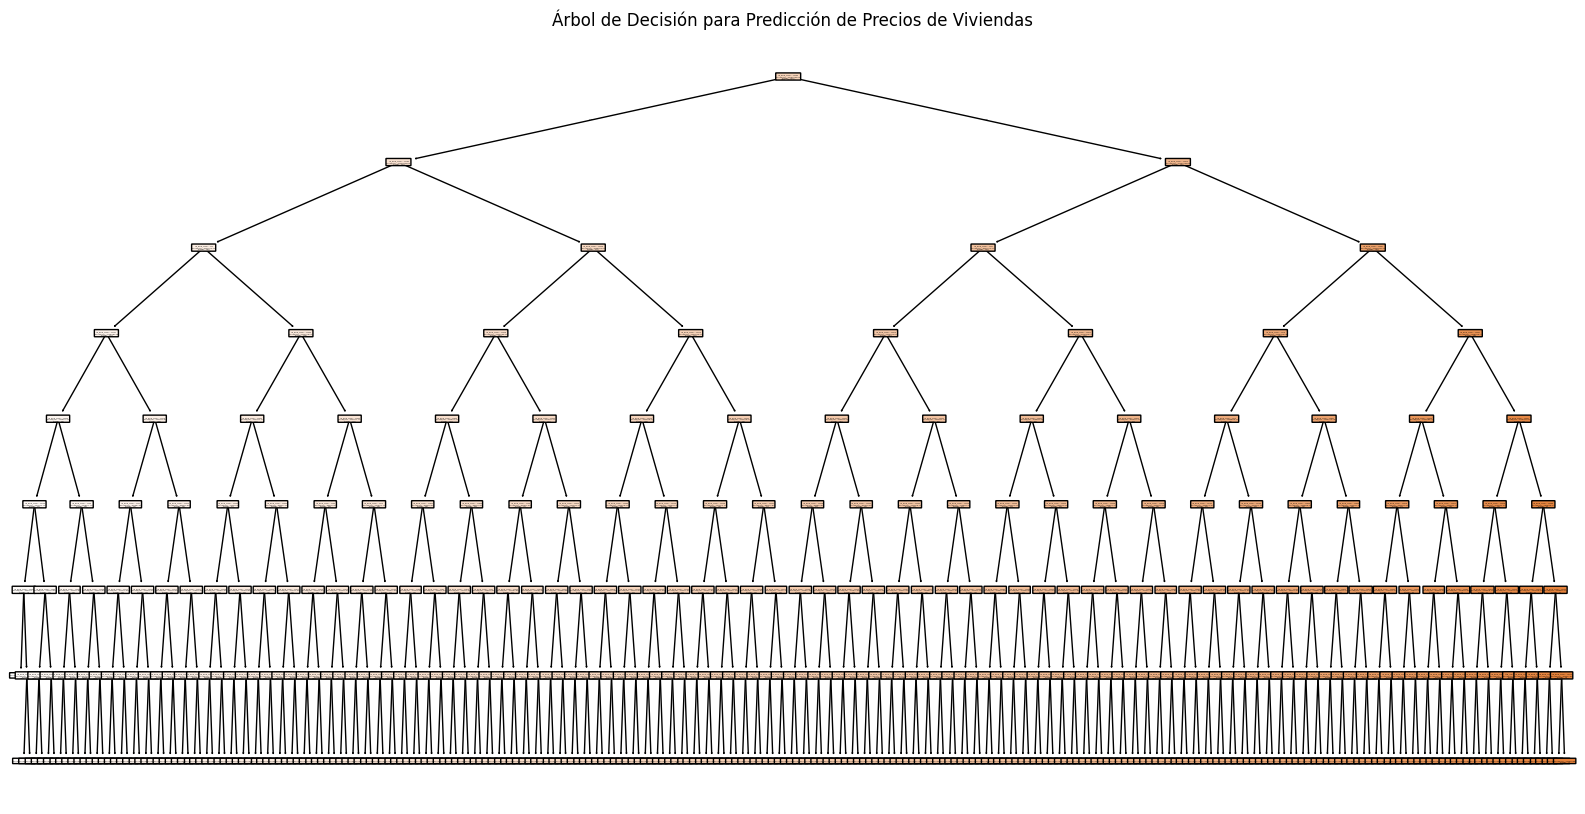

In [402]:
# Diagrama del Árbol
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True)
plt.title('Árbol de Decisión para Predicción de Precios de Viviendas')
plt.show()

In [403]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con 10 folds (ajusta el número de folds según la cantidad de datos)
scores = cross_val_score(modelo, X, y, cv=10, scoring='r2')

# Resultados de la validación cruzada
print("Puntajes de R^2 en cada fold:", scores)
print("Promedio de R^2 en validación cruzada:", scores.mean())
print("Desviación estándar de R^2 en validación cruzada:", scores.std())

Puntajes de R^2 en cada fold: [0.99997136 0.99993455 0.9999711  0.99996151 0.99997098 0.99997243
 0.999943   0.99997281 0.99995634 0.99995081]
Promedio de R^2 en validación cruzada: 0.9999604897181061
Desviación estándar de R^2 en validación cruzada: 1.3137212792914902e-05


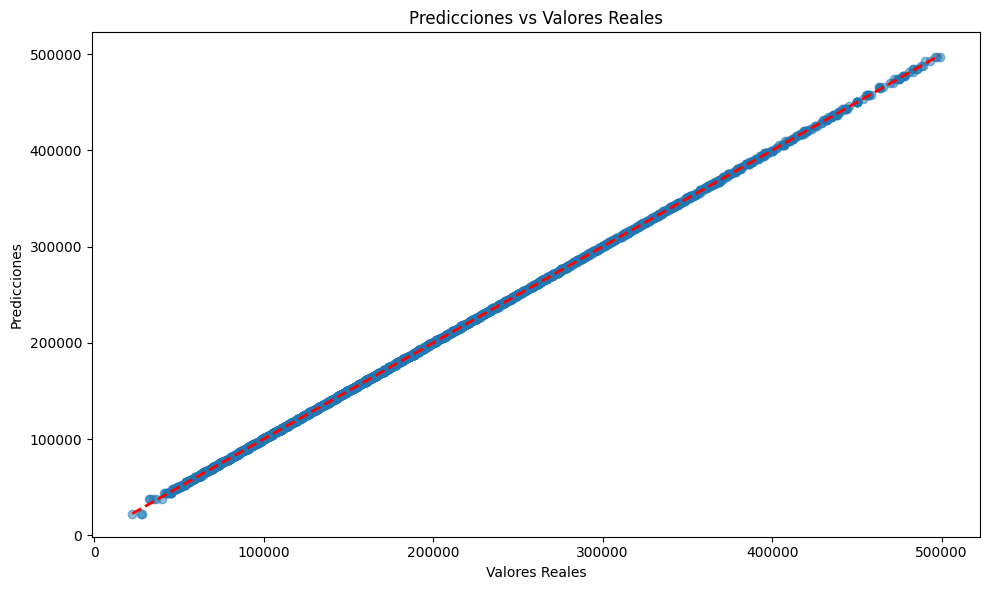

In [404]:
# Visualización de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.tight_layout()
plt.show()